In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
df_raw = pd.read_excel('Gujrat_dataset.xlsx')

In [ ]:
df = df_raw.copy()

In [ ]:
df.shape

(12578, 23)

In [ ]:
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,29,Gujarat,Ahmedabad,Locality_74,Independent House,5,2088,233.29,0.11,1999,Unfurnished,14,9,26,1,2,Medium,Yes,Yes,"Pool, Garden",East,Owner,Ready_to_Move
1,67,Gujarat,Surat,Locality_169,Villa,1,2318,234.83,0.10,1997,Furnished,26,16,28,9,6,High,Yes,Yes,Gym,East,Owner,Under_Construction
2,74,Gujarat,Ahmedabad,Locality_387,Independent House,4,978,418.76,0.43,2001,Semi-furnished,27,30,24,8,2,High,Yes,No,"Clubhouse, Garden, Gym, Pool, Playground",East,Owner,Under_Construction
3,77,Gujarat,Surat,Locality_418,Independent House,3,3757,470.63,0.13,2018,Semi-furnished,11,23,7,6,2,High,Yes,Yes,Gym,South,Builder,Under_Construction
4,118,Gujarat,Surat,Locality_111,Independent House,5,2947,410.00,0.14,2007,Furnished,28,24,18,5,3,Medium,Yes,No,"Garden, Gym, Pool",South,Broker,Under_Construction


In [ ]:
df['City'][df['City'] =='Ahmedabad'].shape + df['City'][df['City'] =='Surat'].shape

(6411, 6167)

In [ ]:
df['Property_Type'].duplicated().sum()

np.int64(12575)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,29,Gujarat,Ahmedabad,Locality_74,Independent House,5,2088,233.29,0.11,1999,Unfurnished,14,9,26,1,2,Medium,Yes,Yes,"Pool, Garden",East,Owner,Ready_to_Move
1,67,Gujarat,Surat,Locality_169,Villa,1,2318,234.83,0.10,1997,Furnished,26,16,28,9,6,High,Yes,Yes,Gym,East,Owner,Under_Construction
2,74,Gujarat,Ahmedabad,Locality_387,Independent House,4,978,418.76,0.43,2001,Semi-furnished,27,30,24,8,2,High,Yes,No,"Clubhouse, Garden, Gym, Pool, Playground",East,Owner,Under_Construction
3,77,Gujarat,Surat,Locality_418,Independent House,3,3757,470.63,0.13,2018,Semi-furnished,11,23,7,6,2,High,Yes,Yes,Gym,South,Builder,Under_Construction
4,118,Gujarat,Surat,Locality_111,Independent House,5,2947,410.00,0.14,2007,Furnished,28,24,18,5,3,Medium,Yes,No,"Garden, Gym, Pool",South,Broker,Under_Construction


In [ ]:
df['ID'] = range(1, len(df) + 1)

In [ ]:
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Gujarat,Ahmedabad,Locality_74,Independent House,5,2088,233.29,0.11,1999,Unfurnished,14,9,26,1,2,Medium,Yes,Yes,"Pool, Garden",East,Owner,Ready_to_Move
1,2,Gujarat,Surat,Locality_169,Villa,1,2318,234.83,0.10,1997,Furnished,26,16,28,9,6,High,Yes,Yes,Gym,East,Owner,Under_Construction
2,3,Gujarat,Ahmedabad,Locality_387,Independent House,4,978,418.76,0.43,2001,Semi-furnished,27,30,24,8,2,High,Yes,No,"Clubhouse, Garden, Gym, Pool, Playground",East,Owner,Under_Construction
3,4,Gujarat,Surat,Locality_418,Independent House,3,3757,470.63,0.13,2018,Semi-furnished,11,23,7,6,2,High,Yes,Yes,Gym,South,Builder,Under_Construction
4,5,Gujarat,Surat,Locality_111,Independent House,5,2947,410.00,0.14,2007,Furnished,28,24,18,5,3,Medium,Yes,No,"Garden, Gym, Pool",South,Broker,Under_Construction


In [ ]:
df = df.sort_values(by='City', key=lambda col: col.map({'Ahmedabad': 0, 'Surat': 1}))

# Reset ID column sequentially (starting from 0)
df['ID'] = range(len(df))

# Optional: reset index if you want clean DataFrame index
df.reset_index(drop=True, inplace=True)

print(df)

          ID    State       City      Locality      Property_Type  BHK  \
0          0  Gujarat  Ahmedabad  Locality_164  Independent House    2   
1          1  Gujarat  Ahmedabad  Locality_494          Apartment    4   
2          2  Gujarat  Ahmedabad  Locality_330  Independent House    5   
3          3  Gujarat  Ahmedabad  Locality_175          Apartment    1   
4          4  Gujarat  Ahmedabad  Locality_221          Apartment    4   
...      ...      ...        ...           ...                ...  ...   
12573  12573  Gujarat      Surat  Locality_129          Apartment    4   
12574  12574  Gujarat      Surat  Locality_111  Independent House    5   
12575  12575  Gujarat      Surat  Locality_418  Independent House    3   
12576  12576  Gujarat      Surat  Locality_169              Villa    1   
12577  12577  Gujarat      Surat  Locality_200              Villa    2   

       Size_in_SqFt  Price_in_Lakhs  Price_per_SqFt  Year_Built  \
0              4793           77.02         

In [ ]:
df

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,0,Gujarat,Ahmedabad,Locality_164,Independent House,2,4793,77.02,0.02,2013,Unfurnished,2,5,12,1,7,High,No,No,Gym,East,Owner,Under_Construction
1,1,Gujarat,Ahmedabad,Locality_494,Apartment,4,4003,311.90,0.08,2010,Semi-furnished,20,11,15,1,2,Low,No,No,"Pool, Playground, Garden, Gym",South,Owner,Under_Construction
2,2,Gujarat,Ahmedabad,Locality_330,Independent House,5,2203,33.56,0.02,2010,Semi-furnished,13,12,15,1,10,Low,Yes,Yes,"Pool, Gym",East,Broker,Ready_to_Move
3,3,Gujarat,Ahmedabad,Locality_175,Apartment,1,2277,305.84,0.13,1994,Furnished,17,13,31,1,10,Low,Yes,Yes,Pool,East,Builder,Ready_to_Move
4,4,Gujarat,Ahmedabad,Locality_221,Apartment,4,1743,108.43,0.06,2010,Semi-furnished,8,3,15,2,6,Low,No,No,"Clubhouse, Playground",West,Broker,Ready_to_Move
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12573,12573,Gujarat,Surat,Locality_129,Apartment,4,4476,29.35,0.01,1997,Furnished,27,9,28,3,4,Low,Yes,Yes,"Playground, Pool, Gym",East,Builder,Ready_to_Move
12574,12574,Gujarat,Surat,Locality_111,Independent House,5,2947,410.00,0.14,2007,Furnished,28,24,18,5,3,Medium,Yes,No,"Garden, Gym, Pool",South,Broker,Under_Construction
12575,12575,Gujarat,Surat,Locality_418,Independent House,3,3757,470.63,0.13,2018,Semi-furnished,11,23,7,6,2,High,Yes,Yes,Gym,South,Builder,Under_Construction
12576,12576,Gujarat,Surat,Locality_169,Villa,1,2318,234.83,0.10,1997,Furnished,26,16,28,9,6,High,Yes,Yes,Gym,East,Owner,Under_Construction


In [ ]:
df['Property_Type'].unique()

array(['Independent House', 'Apartment', 'Villa'], dtype=object)

In [ ]:
df['City'].unique()

array(['Ahmedabad', 'Surat'], dtype=object)

In [ ]:
def to_str_lower(x):
    if pd.isna(x):
        return np.nan
    return str(x).strip().lower()

text_cols = [
    "State","City","Locality","Property_Type","Furnished_Status",
    "Public_Transport_Accessibility","Parking_Space","Security",
    "Amenities","Facing","Owner_Type","Availability_Status"
]
for c in text_cols:
    if c in df.columns:
        df[c] = df[c].apply(to_str_lower)

In [ ]:
df['Public_Transport_Accessibility'].unique()

array(['high', 'low', 'medium'], dtype=object)

In [ ]:
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,0,gujarat,ahmedabad,locality_164,independent house,2,4793,77.02,0.02,2013,unfurnished,2,5,12,1,7,high,no,no,gym,east,owner,under_construction
1,1,gujarat,ahmedabad,locality_494,apartment,4,4003,311.90,0.08,2010,semi-furnished,20,11,15,1,2,low,no,no,"pool, playground, garden, gym",south,owner,under_construction
2,2,gujarat,ahmedabad,locality_330,independent house,5,2203,33.56,0.02,2010,semi-furnished,13,12,15,1,10,low,yes,yes,"pool, gym",east,broker,ready_to_move
3,3,gujarat,ahmedabad,locality_175,apartment,1,2277,305.84,0.13,1994,furnished,17,13,31,1,10,low,yes,yes,pool,east,builder,ready_to_move
4,4,gujarat,ahmedabad,locality_221,apartment,4,1743,108.43,0.06,2010,semi-furnished,8,3,15,2,6,low,no,no,"clubhouse, playground",west,broker,ready_to_move


In [ ]:
# Coerce numerics
num_cols = [
    "BHK","Size_in_SqFt","Price_in_Lakhs","Price_per_SqFt","Year_Built",
    "Floor_No","Total_Floors","Age_of_Property","Nearby_Schools","Nearby_Hospitals"
]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

In [ ]:
df

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,0,gujarat,ahmedabad,locality_164,independent house,2,4793,77.02,0.02,2013,unfurnished,2,5,12,1,7,high,no,no,gym,east,owner,under_construction
1,1,gujarat,ahmedabad,locality_494,apartment,4,4003,311.90,0.08,2010,semi-furnished,20,11,15,1,2,low,no,no,"pool, playground, garden, gym",south,owner,under_construction
2,2,gujarat,ahmedabad,locality_330,independent house,5,2203,33.56,0.02,2010,semi-furnished,13,12,15,1,10,low,yes,yes,"pool, gym",east,broker,ready_to_move
3,3,gujarat,ahmedabad,locality_175,apartment,1,2277,305.84,0.13,1994,furnished,17,13,31,1,10,low,yes,yes,pool,east,builder,ready_to_move
4,4,gujarat,ahmedabad,locality_221,apartment,4,1743,108.43,0.06,2010,semi-furnished,8,3,15,2,6,low,no,no,"clubhouse, playground",west,broker,ready_to_move
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12573,12573,gujarat,surat,locality_129,apartment,4,4476,29.35,0.01,1997,furnished,27,9,28,3,4,low,yes,yes,"playground, pool, gym",east,builder,ready_to_move
12574,12574,gujarat,surat,locality_111,independent house,5,2947,410.00,0.14,2007,furnished,28,24,18,5,3,medium,yes,no,"garden, gym, pool",south,broker,under_construction
12575,12575,gujarat,surat,locality_418,independent house,3,3757,470.63,0.13,2018,semi-furnished,11,23,7,6,2,high,yes,yes,gym,south,builder,under_construction
12576,12576,gujarat,surat,locality_169,villa,1,2318,234.83,0.10,1997,furnished,26,16,28,9,6,high,yes,yes,gym,east,owner,under_construction


In [ ]:
# Public Transport Accessibility → ordinal
pta_map = {"low":0, "medium":1, "high":2}
if "Public_Transport_Accessibility" in df.columns:
    df["PTA_level"] = df["Public_Transport_Accessibility"].map(pta_map)

In [ ]:
# Yes/No binaries
yn_map = {
    "yes":1, "y":1, "true":1, "1":1, 1:1, True:1,
    "no":0, "n":0, "false":0, "0":0, 0:0, False:0
}
for c in ["Parking_Space","Security"]:
    if c in df.columns:
        df[c+"_bin"] = df[c].map(yn_map)

In [ ]:
#Price-per-sqft normalization
df["pps_lakhs_calc"] = df["Price_in_Lakhs"] / df["Size_in_SqFt"]

def normalized_pps_lakhs(row):
    raw = row.get("Price_per_SqFt", np.nan)
    if pd.isna(raw):
        return row["pps_lakhs_calc"]
    # If extremely large, assume it's rupees/sqft; convert to lakhs/sqft
    if raw > 10:  # >10 Lakhs/sqft is unrealistic; treat as rupees
        return raw / 100000.0
    return raw

if "Price_per_SqFt" in df.columns:
    df["pps_lakhs"] = df.apply(normalized_pps_lakhs, axis=1)
else:
    df["pps_lakhs"] = df["pps_lakhs_calc"]

df["pps_rupees"] = df["pps_lakhs"] * 100000.0

In [ ]:
#Age consistency
CURRENT_YEAR = 2025
df["age_from_year_built"] = np.where(
    df["Year_Built"].between(1900, CURRENT_YEAR, inclusive="both"),
    CURRENT_YEAR - df["Year_Built"],
    np.nan
)
if "Age_of_Property" in df.columns:
    df["age_years"] = df["Age_of_Property"].where(
        df["Age_of_Property"].notna(),
        df["age_from_year_built"]
    )
else:
    df["age_years"] = df["age_from_year_built"]

# Clip unrealistic ages
df.loc[df["age_years"] < 0, "age_years"] = np.nan
df.loc[df["age_years"] > 120, "age_years"] = np.nan

In [ ]:
#Building features & checks
for c in ["Floor_No", "Total_Floors"]:
    if c in df.columns:
        df.loc[df[c] < 0, c] = np.nan

# If total_floors is valid and floor_no > total_floors, mark floor_no as NaN
mask_inconsistent = (df["Total_Floors"] > 0) & (df["Floor_No"] > df["Total_Floors"])
df.loc[mask_inconsistent, "Floor_No"] = np.nan

# Derived features
df["floor_ratio"] = np.where(
    (df["Floor_No"].notna()) & (df["Total_Floors"] > 0),
    df["Floor_No"] / df["Total_Floors"], np.nan
)
df["is_ground"] = (df["Floor_No"] == 0).astype("float")
df["is_top"] = (df["Floor_No"] == df["Total_Floors"]).astype("float")

In [ ]:
#Amenities parsing → flags

KNOWN_AMENITIES = ["pool","garden","gym","playground","clubhouse"]

def parse_amenities(val):
    if pd.isna(val):
        return set()
    s = str(val).lower()
    s = re.sub(r"[\[\]\(\)\{\}]", " ", s)  # remove brackets
    parts = re.split(r"[;,/]|(?<=\w)\s+(?=\w)", s)  # split on commas/semicolons/slashes/loose spaces
    cleaned = []
    for t in parts:
        t = t.strip()
        if not t:
            continue
        t = t.replace("-", " ")
        t = re.sub(r"\s+", "_", t)
        cleaned.append(t)
    # Keep only known (extend if you have more)
    keep = set([a for a in cleaned if a in KNOWN_AMENITIES])
    return keep

if "Amenities" in df.columns:
    amen_sets = df["Amenities"].apply(parse_amenities)
else:
    amen_sets = pd.Series([set()]*len(df), index=df.index)

for a in KNOWN_AMENITIES:
    df[f"amenity_{a}"] = amen_sets.apply(lambda s: 1.0 if a in s else 0.0)

df["amenities_count"] = amen_sets.apply(lambda s: float(len(s)))

In [ ]:
#Sanity filters / outlier trimming (robust)
df = df[(df["Price_in_Lakhs"] > 0) & (df["Size_in_SqFt"] > 0)]
df = df[df["BHK"].between(1, 12, inclusive="both")]

# Quantile trims
def trim_by_quantile(series, low=0.01, high=0.99):
    lo, hi = series.quantile([low, high])
    return lo, hi

for c, (lo_q, hi_q) in {
    "pps_rupees": (0.01, 0.99),
    "Size_in_SqFt": (0.01, 0.99),
    "Price_in_Lakhs": (0.01, 0.99)
}.items():
    if c in df.columns:
        lo, hi = trim_by_quantile(df[c].dropna(), lo_q, hi_q)
        df = df[(df[c].isna()) | ((df[c] >= lo) & (df[c] <= hi))]

In [ ]:
df

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status,PTA_level,Parking_Space_bin,Security_bin,pps_lakhs_calc,pps_lakhs,pps_rupees,age_from_year_built,age_years,floor_ratio,is_ground,is_top,amenity_pool,amenity_garden,amenity_gym,amenity_playground,amenity_clubhouse,amenities_count
0,0,gujarat,ahmedabad,locality_164,independent house,2,4793,77.02,0.02,2013,unfurnished,2.0,5.0,12,1,7,high,no,no,gym,east,owner,under_construction,2,0,0,0.016069,0.02,2000.0,12.0,12.0,0.400000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,gujarat,ahmedabad,locality_494,apartment,4,4003,311.90,0.08,2010,semi-furnished,NaN,11.0,15,1,2,low,no,no,"pool, playground, garden, gym",south,owner,under_construction,0,0,0,0.077917,0.08,8000.0,15.0,15.0,NaN,0.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0
2,2,gujarat,ahmedabad,locality_330,independent house,5,2203,33.56,0.02,2010,semi-furnished,NaN,12.0,15,1,10,low,yes,yes,"pool, gym",east,broker,ready_to_move,0,1,1,0.015234,0.02,2000.0,15.0,15.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
3,3,gujarat,ahmedabad,locality_175,apartment,1,2277,305.84,0.13,1994,furnished,NaN,13.0,31,1,10,low,yes,yes,pool,east,builder,ready_to_move,0,1,1,0.134317,0.13,13000.0,31.0,31.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,4,gujarat,ahmedabad,locality_221,apartment,4,1743,108.43,0.06,2010,semi-furnished,NaN,3.0,15,2,6,low,no,no,"clubhouse, playground",west,broker,ready_to_move,0,0,0,0.062209,0.06,6000.0,15.0,15.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12573,12573,gujarat,surat,locality_129,apartment,4,4476,29.35,0.01,1997,furnished,NaN,9.0,28,3,4,low,yes,yes,"playground, pool, gym",east,builder,ready_to_move,0,1,1,0.006557,0.01,1000.0,28.0,28.0,NaN,0.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0
12574,12574,gujarat,surat,locality_111,independent house,5,2947,410.00,0.14,2007,furnished,NaN,24.0,18,5,3,medium,yes,no,"garden, gym, pool",south,broker,under_construction,1,1,0,0.139125,0.14,14000.0,18.0,18.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0
12575,12575,gujarat,surat,locality_418,independent house,3,3757,470.63,0.13,2018,semi-furnished,11.0,23.0,7,6,2,high,yes,yes,gym,south,builder,under_construction,2,1,1,0.125268,0.13,13000.0,7.0,7.0,0.478261,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
12576,12576,gujarat,surat,locality_169,villa,1,2318,234.83,0.10,1997,furnished,NaN,16.0,28,9,6,high,yes,yes,gym,east,owner,under_construction,2,1,1,0.101307,0.10,10000.0,28.0,28.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
# Choose target
TARGET = "Price_in_Lakhs"

# Numeric feature set
num_features = [
    "BHK","Size_in_SqFt","pps_rupees","age_years",
    "Nearby_Schools","Nearby_Hospitals",
    "Floor_No","Total_Floors","floor_ratio",
    "is_ground","is_top","amenities_count"
]

In [ ]:
# Binary features from yes/no
bin_features = []
for c in ["Parking_Space_bin","Security_bin"]:
    if c in df.columns:
        bin_features.append(c)

# Ordinal (PTA_level)
ord_features = []
if "PTA_level" in df.columns:
    ord_features.append("PTA_level")

In [ ]:
# Categorical (keep as strings; ideal for CatBoost)
cat_features = [
    "City","Locality","Property_Type","Furnished_Status",
    "Facing","Owner_Type","Availability_Status"
]
cat_features = [c for c in cat_features if c in df.columns]

In [ ]:
# Amenity flags
amen_flag_features = [f"amenity_{a}" for a in KNOWN_AMENITIES]

In [ ]:
# Keep only relevant columns + target
keep_cols = [TARGET] + num_features + bin_features + ord_features + cat_features + amen_flag_features
df_model = df[keep_cols].copy()

In [ ]:
# Ensure dtypes: numeric as float, categoricals as string
for c in num_features + bin_features + ord_features + amen_flag_features:
    if c in df_model.columns:
        df_model[c] = pd.to_numeric(df_model[c], errors="coerce")

for c in cat_features:
    df_model[c] = df_model[c].astype("string")

In [ ]:
df_model["log_price_lakhs"] = np.log1p(df_model[TARGET])

In [ ]:
cols_to_drop = [
    "ID",
    "State",
    "Price_per_SqFt",
    "pps_lakhs_calc",
    "pps_lakhs",
    "age_from_year_built",
    "Age_of_Property",
    "Year_Built"
]

df = df.drop(columns=cols_to_drop)

In [ ]:
print("Rows after cleaning:", len(df_model))
print("Sample columns:", df_model.columns.tolist())

Rows after cleaning: 11965
Sample columns: ['Price_in_Lakhs', 'BHK', 'Size_in_SqFt', 'pps_rupees', 'age_years', 'Nearby_Schools', 'Nearby_Hospitals', 'Floor_No', 'Total_Floors', 'floor_ratio', 'is_ground', 'is_top', 'amenities_count', 'Parking_Space_bin', 'Security_bin', 'PTA_level', 'City', 'Locality', 'Property_Type', 'Furnished_Status', 'Facing', 'Owner_Type', 'Availability_Status', 'amenity_pool', 'amenity_garden', 'amenity_gym', 'amenity_playground', 'amenity_clubhouse', 'log_price_lakhs']


In [ ]:
print("Categorical feature columns:", cat_features)
print("Numeric+bin+ord+amenity columns:", num_features + bin_features + ord_features + amen_flag_features)

Categorical feature columns: ['City', 'Locality', 'Property_Type', 'Furnished_Status', 'Facing', 'Owner_Type', 'Availability_Status']
Numeric+bin+ord+amenity columns: ['BHK', 'Size_in_SqFt', 'pps_rupees', 'age_years', 'Nearby_Schools', 'Nearby_Hospitals', 'Floor_No', 'Total_Floors', 'floor_ratio', 'is_ground', 'is_top', 'amenities_count', 'Parking_Space_bin', 'Security_bin', 'PTA_level', 'amenity_pool', 'amenity_garden', 'amenity_gym', 'amenity_playground', 'amenity_clubhouse']


In [ ]:
df

,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Furnished_Status,Floor_No,Total_Floors,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status,PTA_level,Parking_Space_bin,Security_bin,pps_rupees,age_years,floor_ratio,is_ground,is_top,amenity_pool,amenity_garden,amenity_gym,amenity_playground,amenity_clubhouse,amenities_count
0,ahmedabad,locality_164,independent house,2,4793,77.02,unfurnished,2.0,5.0,1,7,high,no,no,gym,east,owner,under_construction,2,0,0,2000.0,12.0,0.400000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,ahmedabad,locality_494,apartment,4,4003,311.90,semi-furnished,NaN,11.0,1,2,low,no,no,"pool, playground, garden, gym",south,owner,under_construction,0,0,0,8000.0,15.0,NaN,0.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0
2,ahmedabad,locality_330,independent house,5,2203,33.56,semi-furnished,NaN,12.0,1,10,low,yes,yes,"pool, gym",east,broker,ready_to_move,0,1,1,2000.0,15.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
3,ahmedabad,locality_175,apartment,1,2277,305.84,furnished,NaN,13.0,1,10,low,yes,yes,pool,east,builder,ready_to_move,0,1,1,13000.0,31.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,ahmedabad,locality_221,apartment,4,1743,108.43,semi-furnished,NaN,3.0,2,6,low,no,no,"clubhouse, playground",west,broker,ready_to_move,0,0,0,6000.0,15.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12573,surat,locality_129,apartment,4,4476,29.35,furnished,NaN,9.0,3,4,low,yes,yes,"playground, pool, gym",east,builder,ready_to_move,0,1,1,1000.0,28.0,NaN,0.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0
12574,surat,locality_111,independent house,5,2947,410.00,furnished,NaN,24.0,5,3,medium,yes,no,"garden, gym, pool",south,broker,under_construction,1,1,0,14000.0,18.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0
12575,surat,locality_418,independent house,3,3757,470.63,semi-furnished,11.0,23.0,6,2,high,yes,yes,gym,south,builder,under_construction,2,1,1,13000.0,7.0,0.478261,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
12576,surat,locality_169,villa,1,2318,234.83,furnished,NaN,16.0,9,6,high,yes,yes,gym,east,owner,under_construction,2,1,1,10000.0,28.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

Shape of dataset: (11965, 32)

Data Types:
 City                               object
Locality                           object
Property_Type                      object
BHK                                 int64
Size_in_SqFt                        int64
Price_in_Lakhs                    float64
Furnished_Status                   object
Floor_No                          float64
Total_Floors                      float64
Nearby_Schools                      int64
Nearby_Hospitals                    int64
Public_Transport_Accessibility     object
Parking_Space                      object
Security                           object
Amenities                          object
Facing                             object
Owner_Type                         object
Availability_Status                object
PTA_level                           int64
Parking_Space_bin                   int64
Security_bin                        int64
pps_rupees                        float64
age_years                       

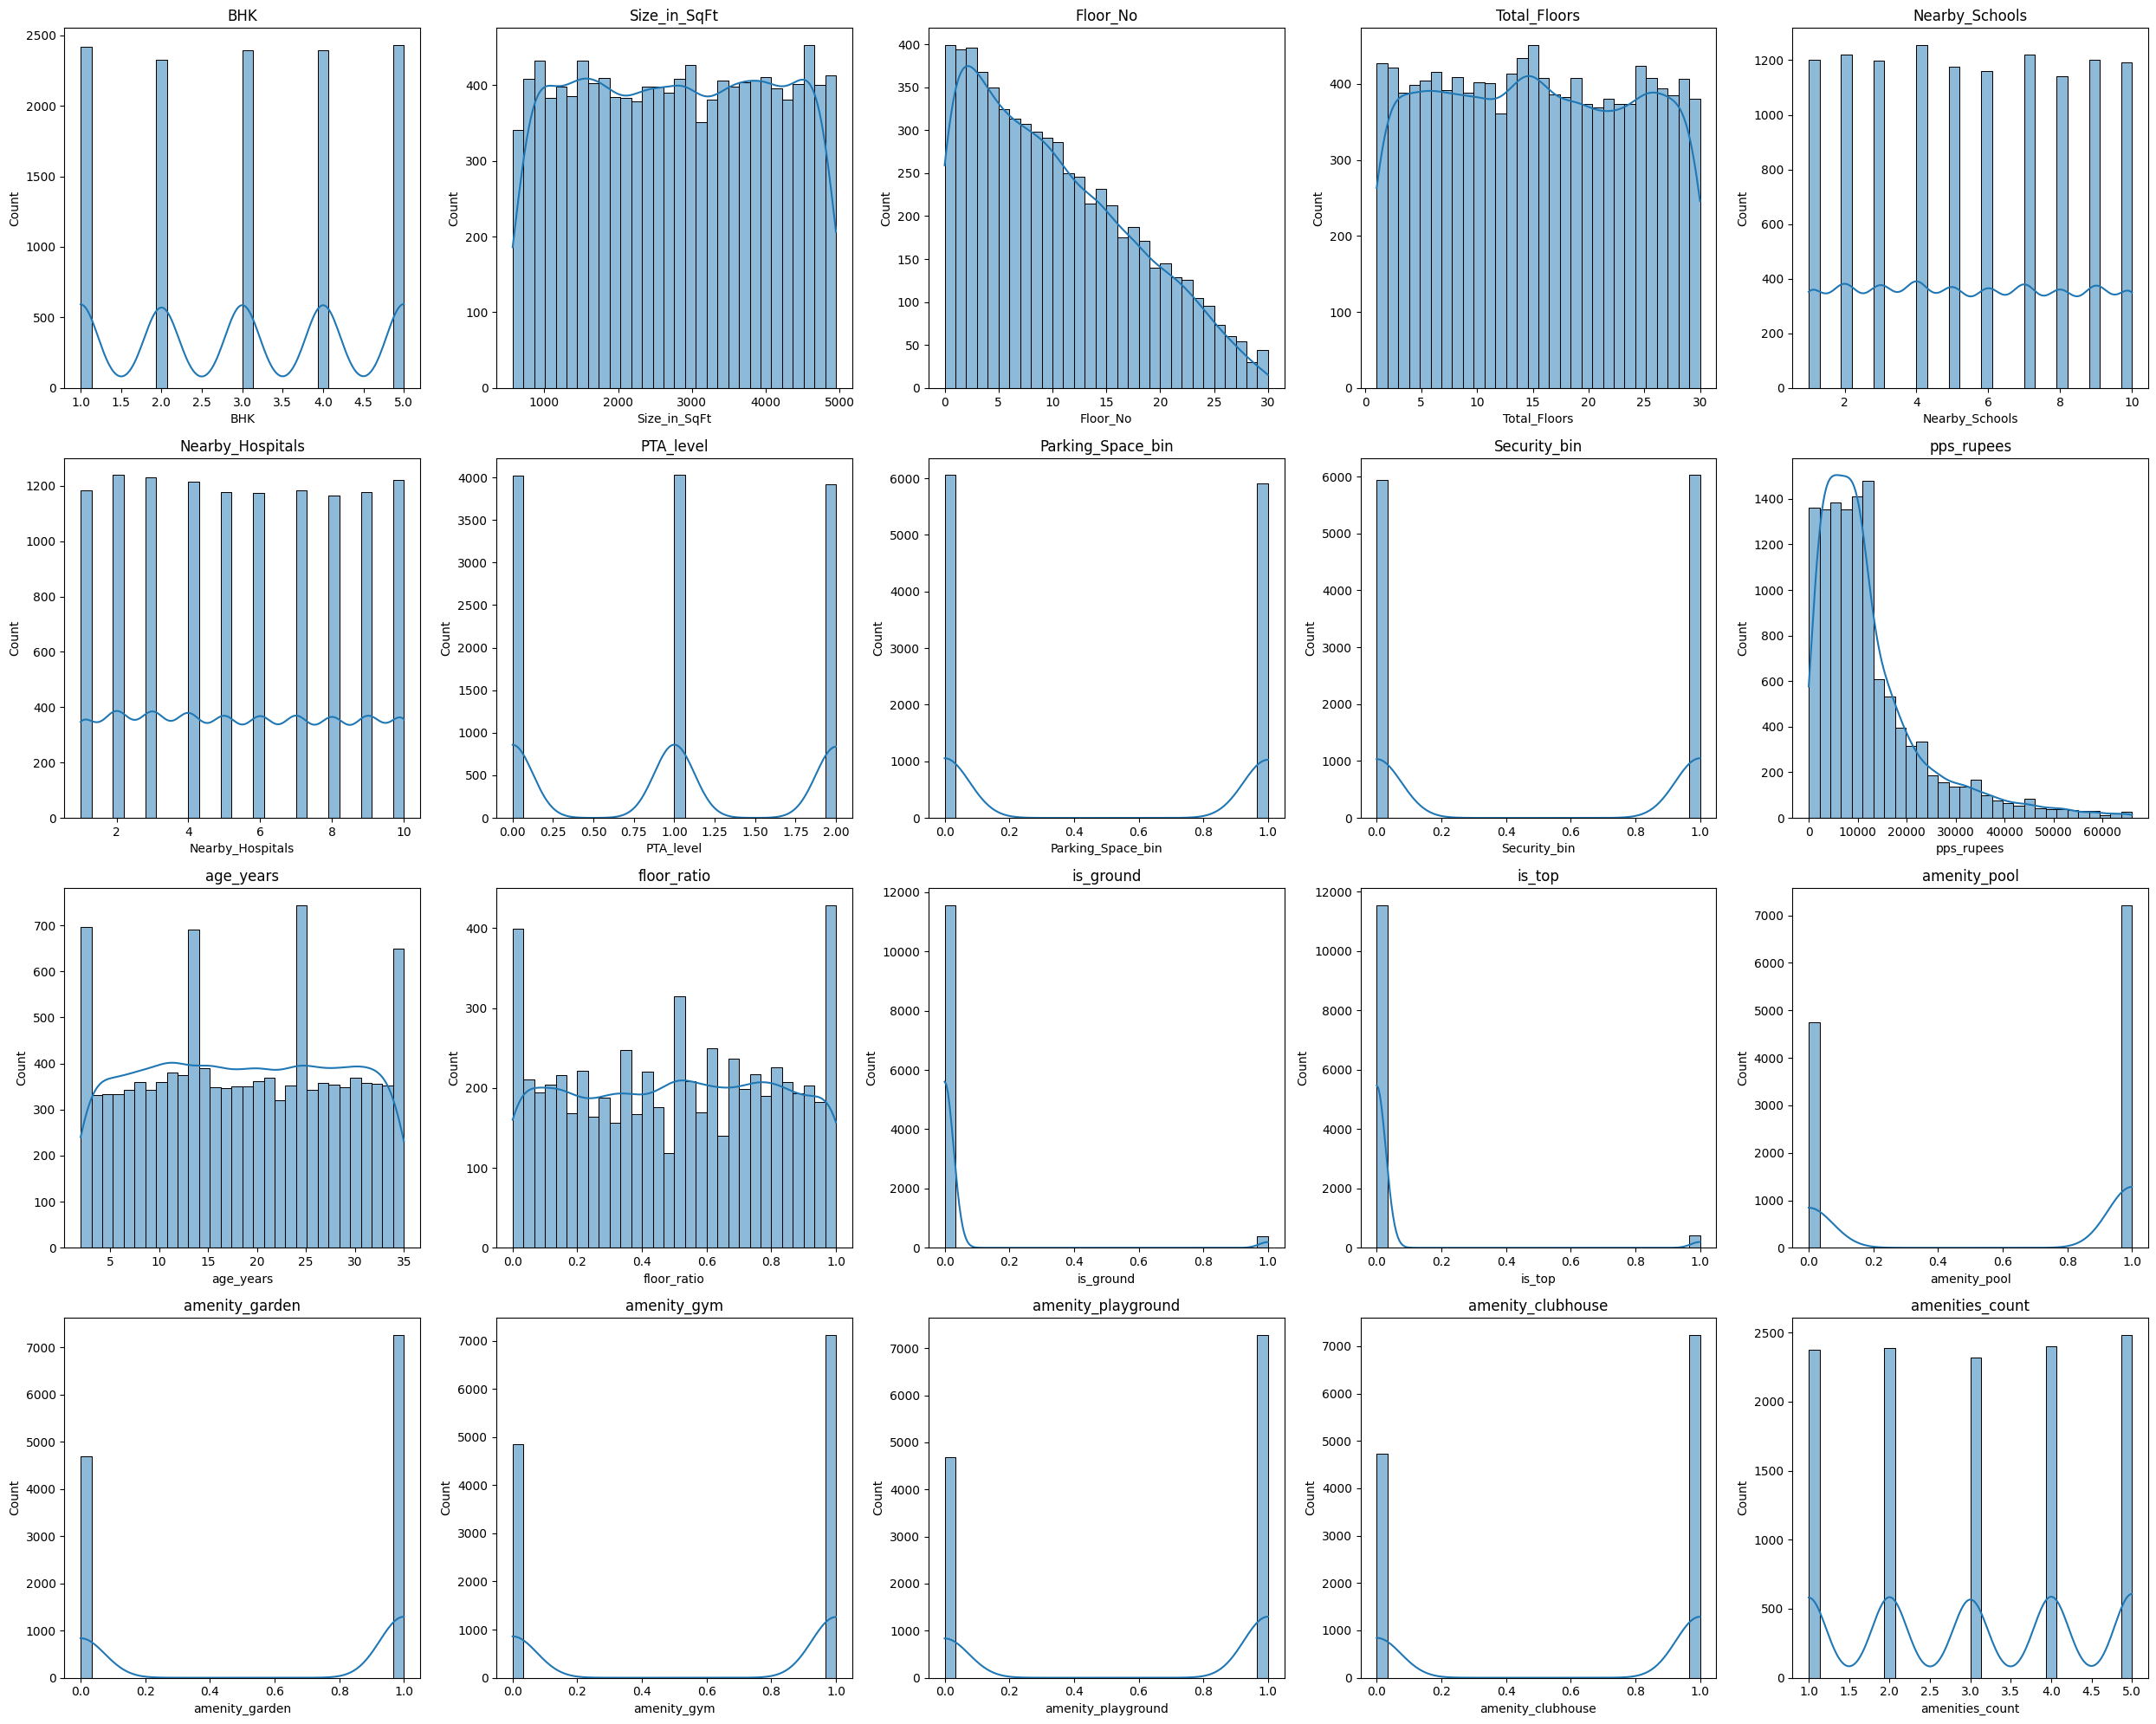

In [ ]:
# Univariate Analysis
# Numeric Columns
import math

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop(['Price_in_Lakhs'])

# Calculate grid size
n_cols = 5
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col].dropna(), kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"{col}")

# Hide unused subplots
for j in range(len(numeric_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

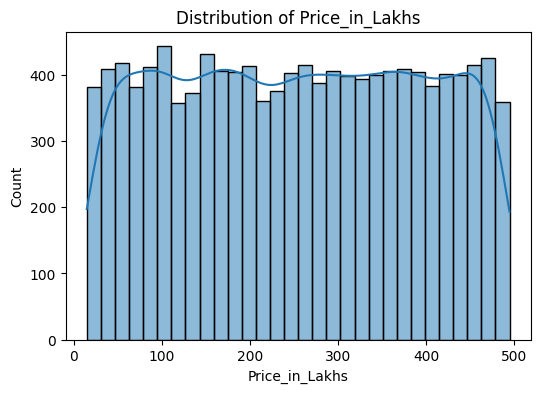

In [ ]:
# Target Variable
plt.figure(figsize=(6,4))
sns.histplot(df['Price_in_Lakhs'], kde=True, bins=30)
plt.title("Distribution of Price_in_Lakhs")
plt.show()

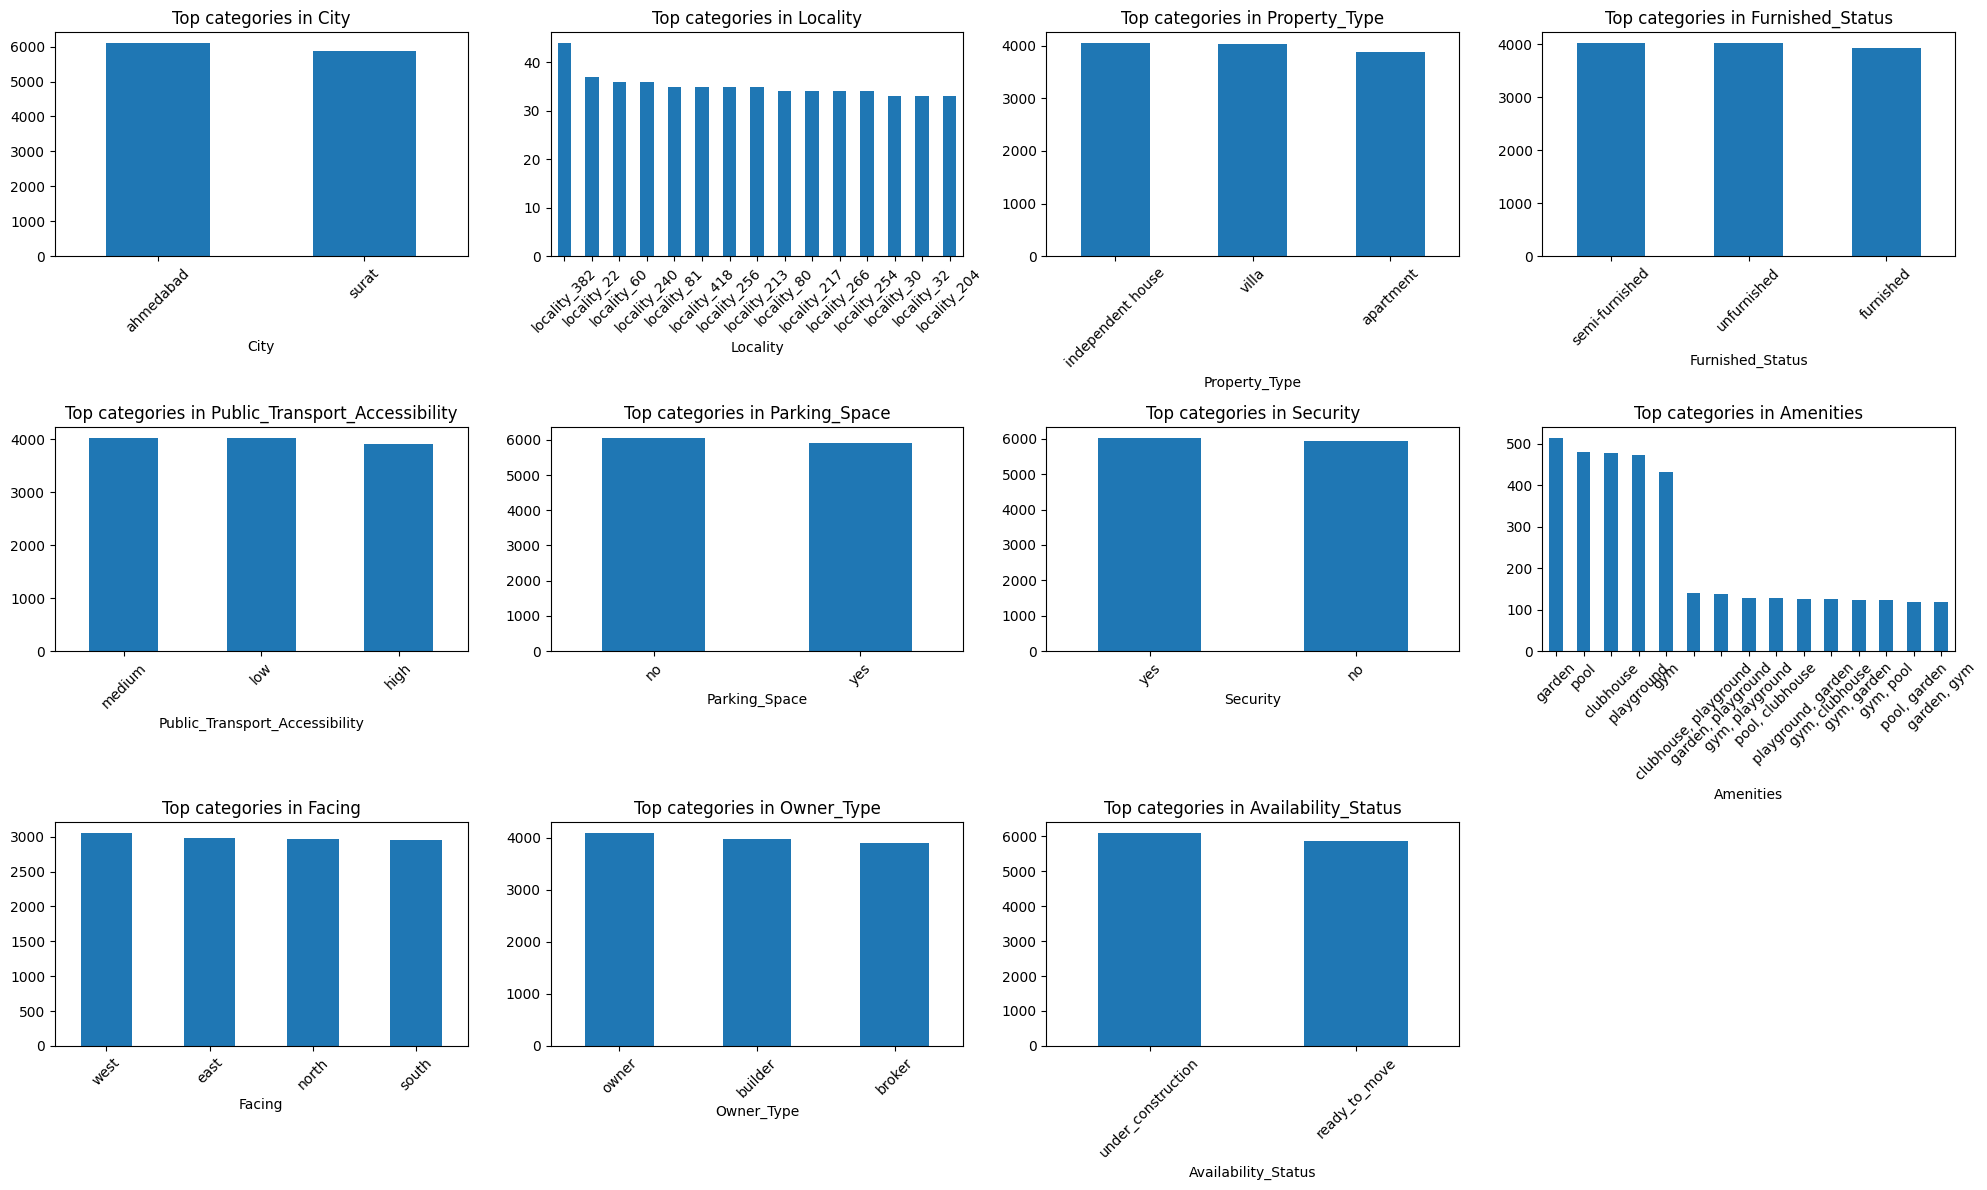

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'string']).columns

# Set up the subplot grid: 3 rows × 4 columns
n_cols = 4
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

# Plot each categorical column
for i, col in enumerate(categorical_cols):
    df[col].value_counts().head(15).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"Top categories in {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots if any
for j in range(len(categorical_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


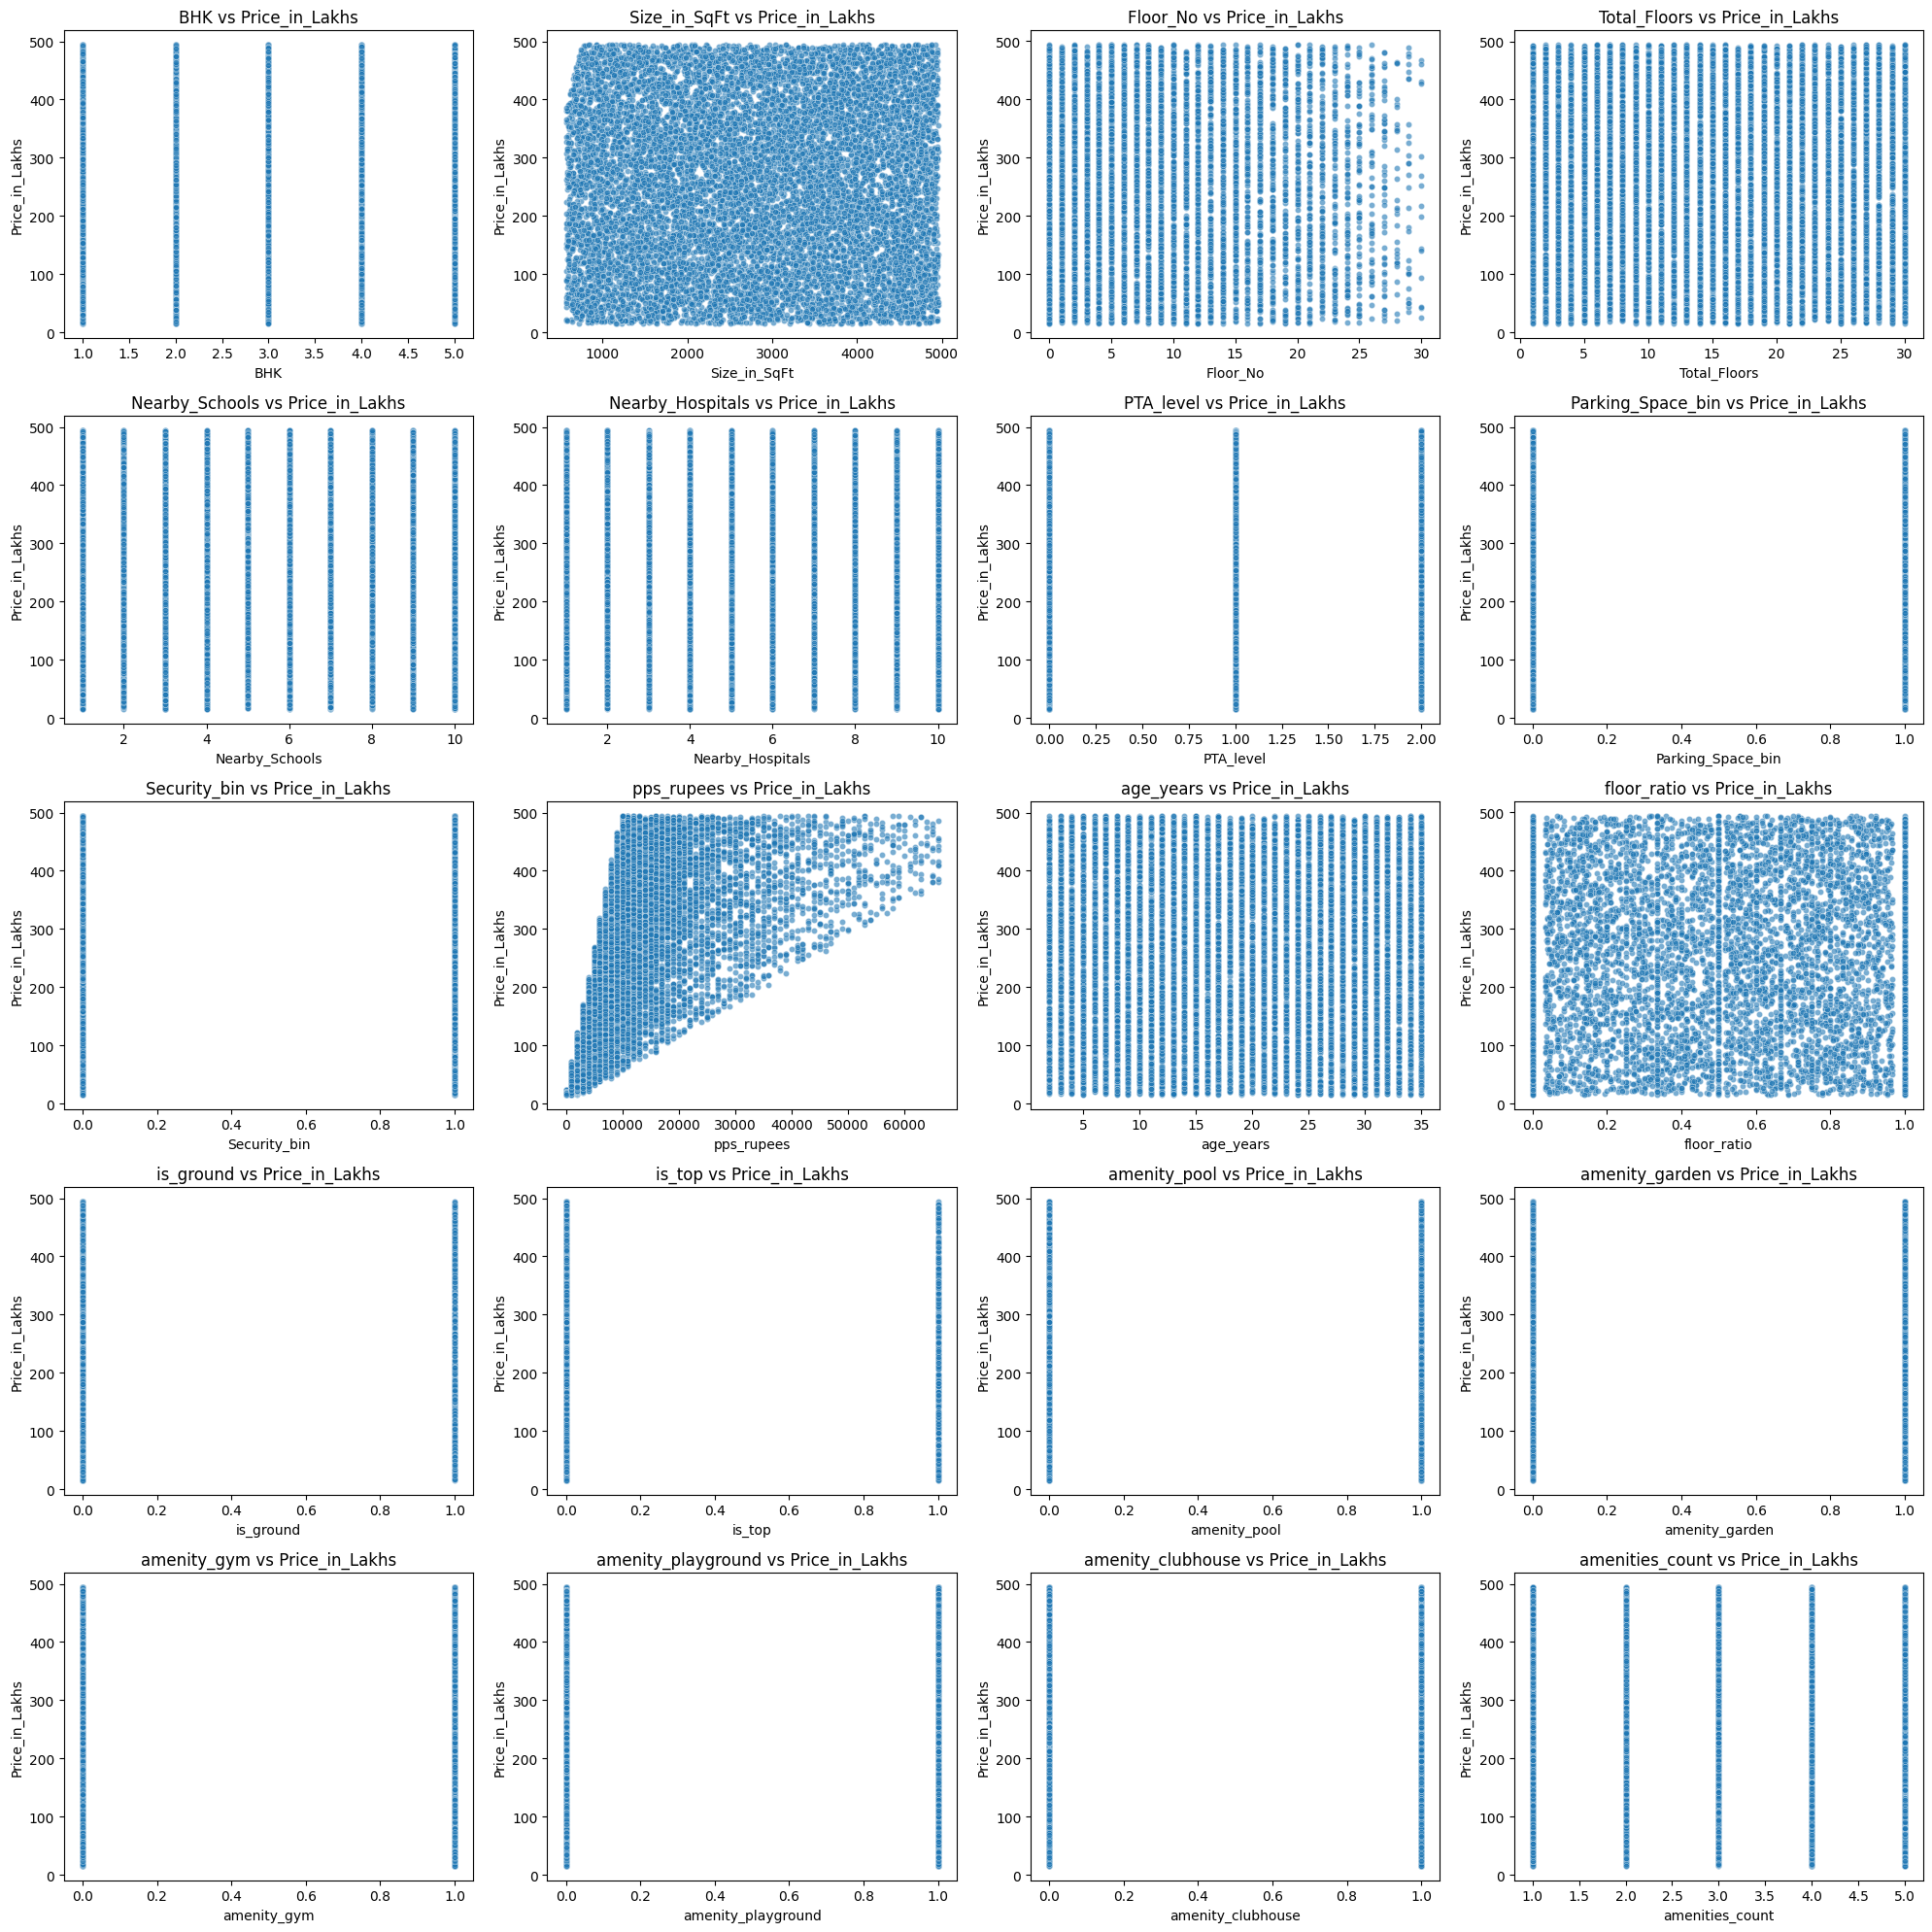

In [ ]:
# Bivariate Analysis
# Numeric vs Price
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.scatterplot(x=df[col], y=df['Price_in_Lakhs'], ax=axes[i], s=20, alpha=0.6)
    axes[i].set_title(f"{col} vs Price_in_Lakhs")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Price_in_Lakhs")

# Hide unused subplots if any
for j in range(len(numeric_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

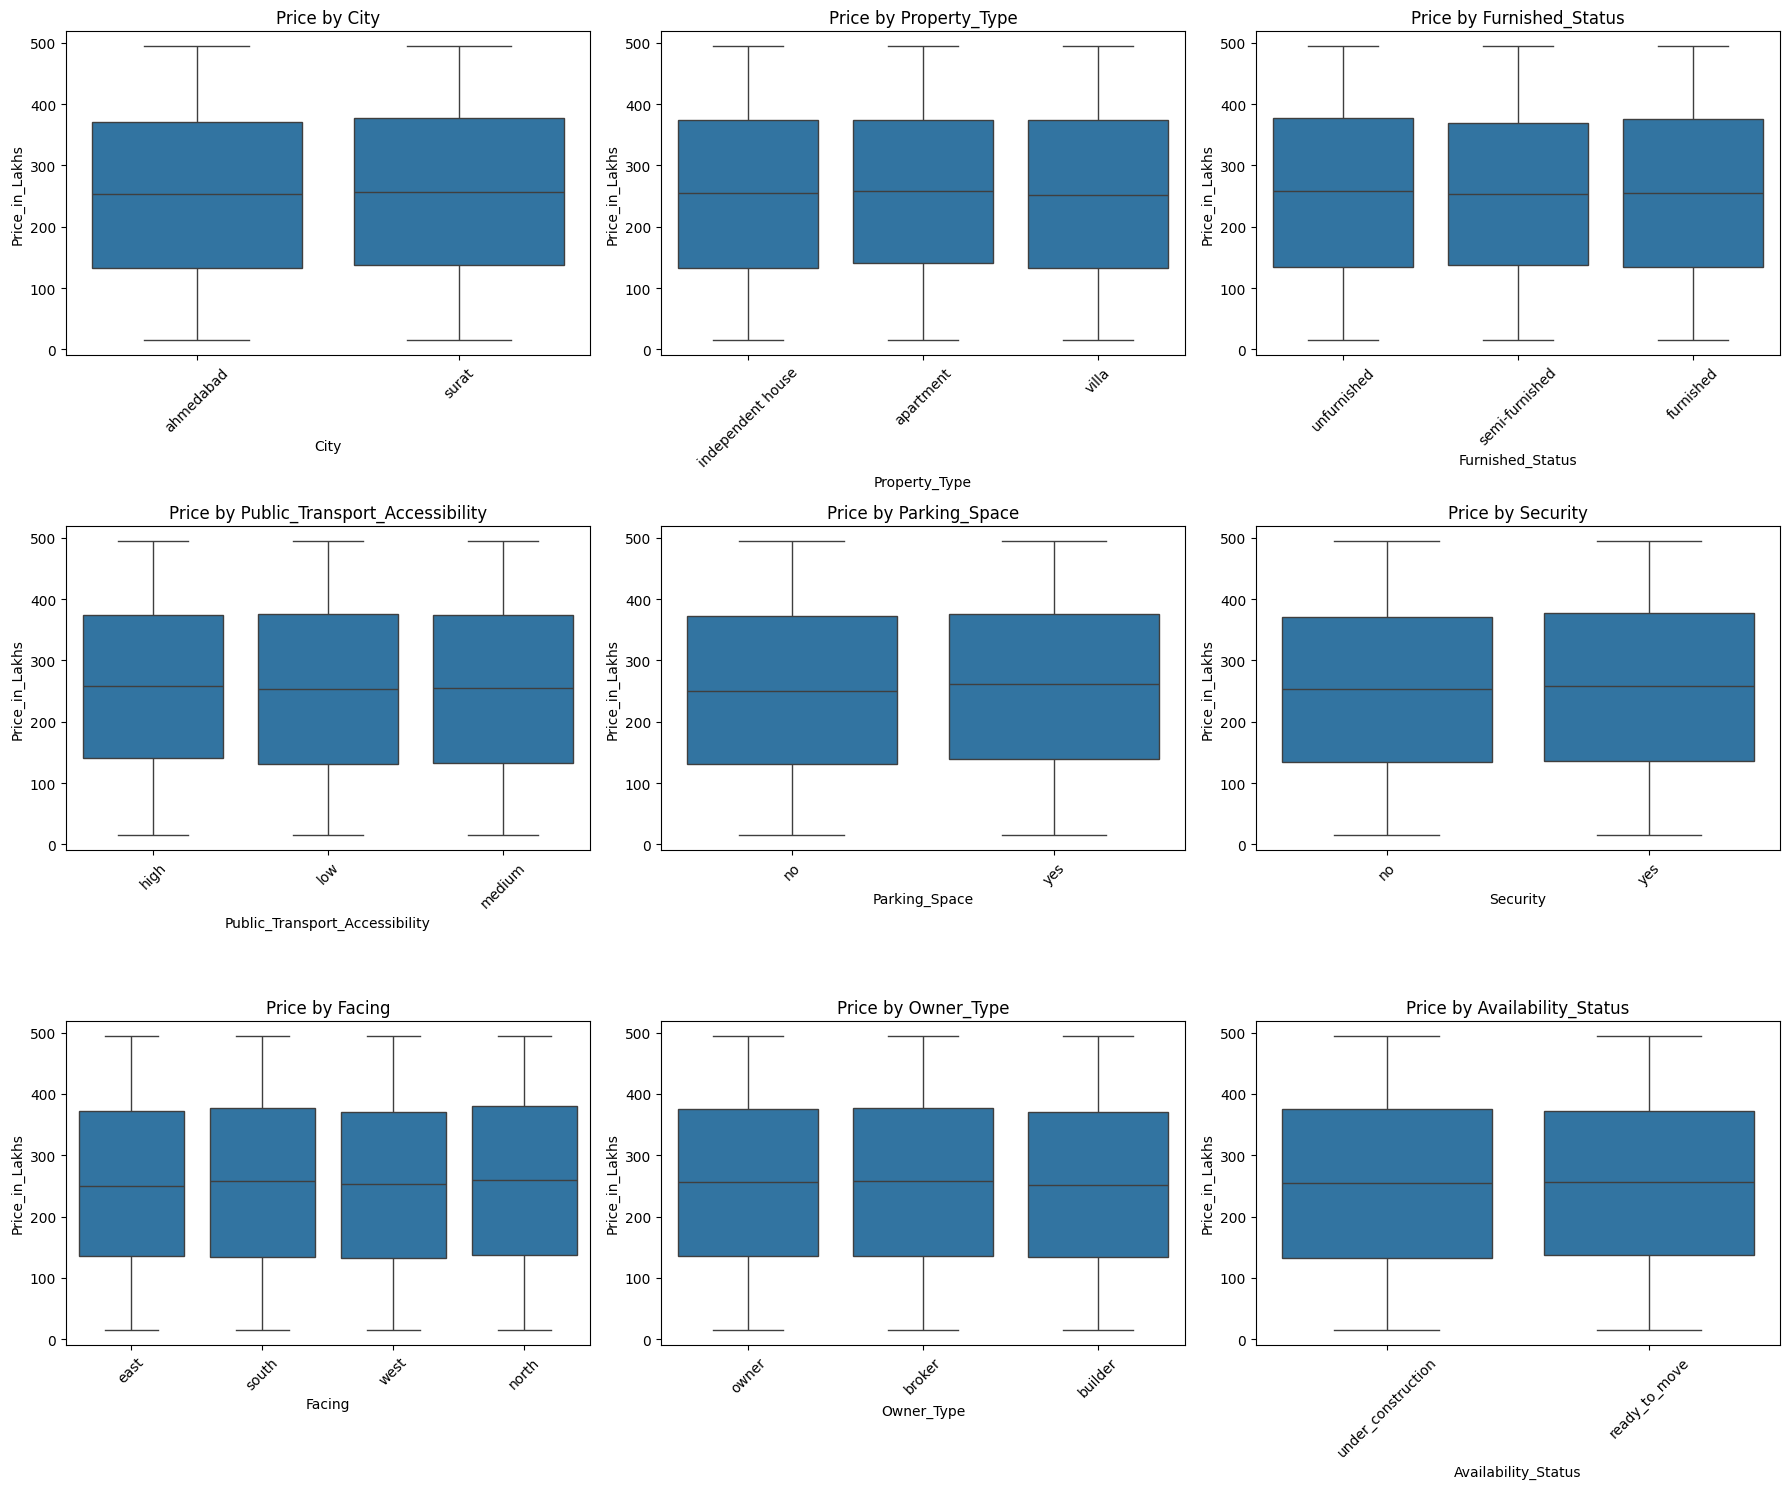

In [ ]:
# Categorical vs Price (Boxplots)
filtered_cats = [col for col in categorical_cols if df[col].nunique() <= 15]

n_cols = 3
n_rows = (len(filtered_cats) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(filtered_cats):
    sns.boxplot(x=col, y='Price_in_Lakhs', data=df, ax=axes[i])
    axes[i].set_title(f"Price by {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots if any
for j in range(len(filtered_cats), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

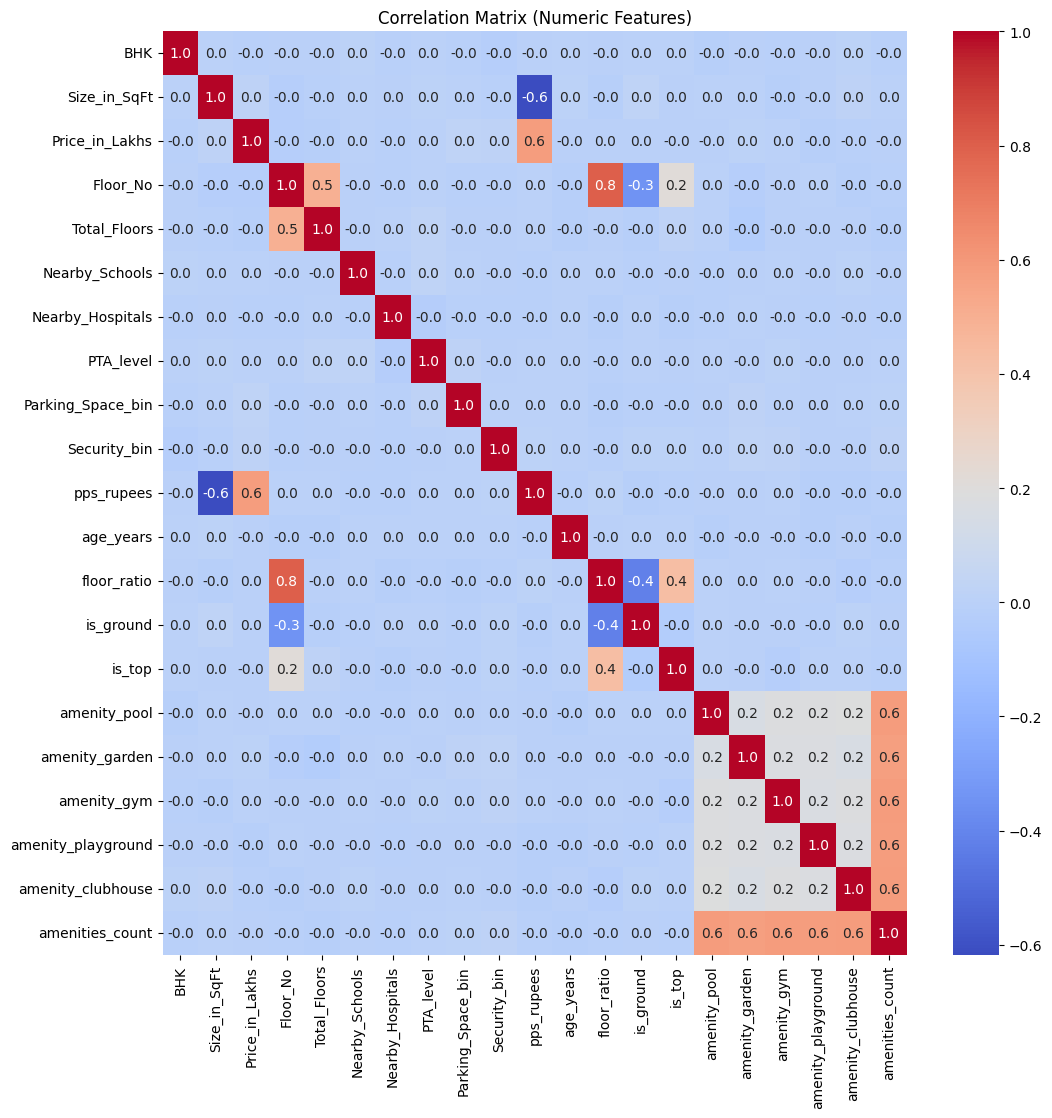

In [ ]:
# Correlation Heatmap

plt.figure(figsize=(12,12))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()


Locality Price Stats:
               count   median
Locality                    
locality_263     16  442.000
locality_319     19  390.940
locality_397     20  379.345
locality_53      22  375.460
locality_369     16  370.195
locality_123     15  369.260
locality_125     19  368.790
locality_459     28  366.480
locality_494     22  365.150
locality_253     17  362.960
locality_116     20  358.125
locality_3       22  357.320
locality_284     25  354.940
locality_333     28  351.415
locality_76      21  351.010
locality_128     29  345.950
locality_158     27  345.080
locality_206     28  341.690
locality_337     24  340.570
locality_19      14  339.935


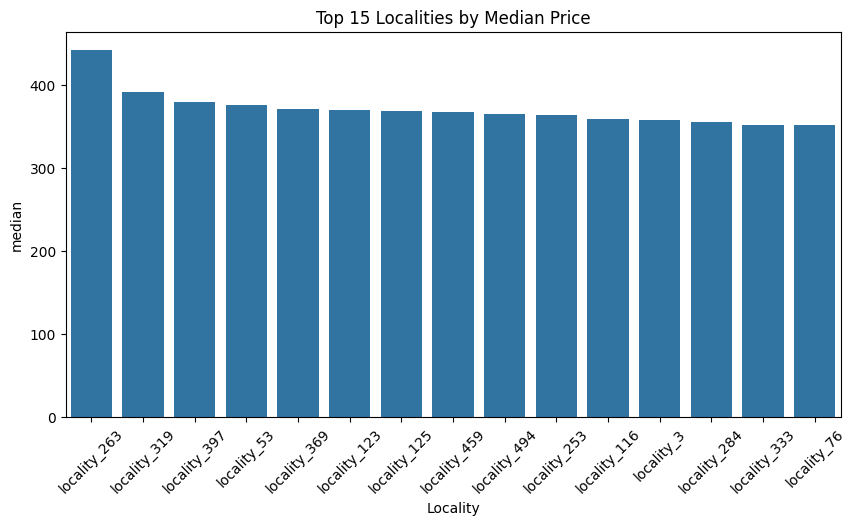

In [ ]:
# Locality Analysis

locality_stats = df.groupby("Locality")["Price_in_Lakhs"].agg(['count','median']).sort_values(by="median", ascending=False)

print("\nLocality Price Stats:\n", locality_stats.head(20))

# Plot top 15 expensive localities
top_localities = locality_stats.head(15).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=top_localities, x="Locality", y="median")
plt.xticks(rotation=45)
plt.title("Top 15 Localities by Median Price")
plt.show()

In [ ]:
df

,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Furnished_Status,Floor_No,Total_Floors,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status,PTA_level,Parking_Space_bin,Security_bin,pps_rupees,age_years,floor_ratio,is_ground,is_top,amenity_pool,amenity_garden,amenity_gym,amenity_playground,amenity_clubhouse,amenities_count
0,ahmedabad,locality_164,independent house,2,4793,77.02,unfurnished,2.0,5.0,1,7,high,no,no,gym,east,owner,under_construction,2,0,0,2000.0,12.0,0.400000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,ahmedabad,locality_494,apartment,4,4003,311.90,semi-furnished,NaN,11.0,1,2,low,no,no,"pool, playground, garden, gym",south,owner,under_construction,0,0,0,8000.0,15.0,NaN,0.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0
2,ahmedabad,locality_330,independent house,5,2203,33.56,semi-furnished,NaN,12.0,1,10,low,yes,yes,"pool, gym",east,broker,ready_to_move,0,1,1,2000.0,15.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
3,ahmedabad,locality_175,apartment,1,2277,305.84,furnished,NaN,13.0,1,10,low,yes,yes,pool,east,builder,ready_to_move,0,1,1,13000.0,31.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,ahmedabad,locality_221,apartment,4,1743,108.43,semi-furnished,NaN,3.0,2,6,low,no,no,"clubhouse, playground",west,broker,ready_to_move,0,0,0,6000.0,15.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12573,surat,locality_129,apartment,4,4476,29.35,furnished,NaN,9.0,3,4,low,yes,yes,"playground, pool, gym",east,builder,ready_to_move,0,1,1,1000.0,28.0,NaN,0.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0
12574,surat,locality_111,independent house,5,2947,410.00,furnished,NaN,24.0,5,3,medium,yes,no,"garden, gym, pool",south,broker,under_construction,1,1,0,14000.0,18.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0
12575,surat,locality_418,independent house,3,3757,470.63,semi-furnished,11.0,23.0,6,2,high,yes,yes,gym,south,builder,under_construction,2,1,1,13000.0,7.0,0.478261,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
12576,surat,locality_169,villa,1,2318,234.83,furnished,NaN,16.0,9,6,high,yes,yes,gym,east,owner,under_construction,2,1,1,10000.0,28.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
#!pip install ydata-profiling

In [ ]:
# from ydata_profiling import ProfileReport
# import pandas as pd

# # Create the profile report
# profile = ProfileReport(
#     df,
#     title="House Price Data Profiling Report",
#     explorative=True
# )

# # Save to HTML file
# profile.to_file("house_price_profiling_report.html")

In [ ]:
# profile.to_notebook_iframe()

In [ ]:
# df.to_csv('cleaned_data.csv')

In [ ]:
temp_df = df.groupby(['City'])[['Locality']]

In [ ]:
temp_df.value_counts()

City       Locality    
ahmedabad  locality_382    25
           locality_129    22
           locality_217    22
           locality_418    22
           locality_132    21
                           ..
surat      locality_55      5
           locality_124     4
           locality_90      4
           locality_43      3
           locality_138     2
Name: count, Length: 1000, dtype: int64

In [ ]:
df[df['City'] == 'ahmedabad'][['Locality']].value_counts()

,count
Locality,
locality_382,25
locality_418,22
locality_129,22
locality_217,22
locality_132,21
...,...
locality_253,5
locality_173,5
locality_405,4
